In [3]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 11.2 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.9-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 8.9 MB/s eta 0:00:00
  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 11.1 MB/s eta 0:00:0000:0100:01
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# XOR with MLP (PyTorch)
# ---------------------------------------------------------
# Env: PyTorch >= 1.10 (CPU OK)
# Task: XOR -> 단일 퍼셉트론은 불가능하지만 MLP는 가능
# ---------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim

# 1) 데이터(XOR)
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]], dtype=torch.float32)
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]], dtype=torch.float32)

# 2) 모델 정의: 2 -> 4 -> 1 (ReLU + Sigmoid)
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

torch.manual_seed(42)
model = XORMLP()

# 3) 손실/옵티마이저
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

# 4) 학습 루프
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(X)              # forward
    loss = criterion(out, y)    # BCE
    loss.backward()             # backprop
    optimizer.step()            # update
    if (epoch+1) % 200 == 0:
        with torch.no_grad():
            pred = (out >= 0.5).float()
            acc = (pred.eq(y)).float().mean().item()
        print(f"Epoch {epoch+1:4d} | loss={loss.item():.4f} | acc={acc:.3f}")

# 5) 최종 예측 확인
with torch.no_grad():
    out = model(X)
    pred = (out >= 0.5).float()
    print("\nPred probs:\n", out.squeeze().round(decimals=4))
    print("Pred labels:\n", pred.squeeze().int().tolist())
    print("True  labels:\n", y.squeeze().int().tolist())


Epoch  200 | loss=0.0090 | acc=1.000
Epoch  400 | loss=0.0028 | acc=1.000
Epoch  600 | loss=0.0015 | acc=1.000
Epoch  800 | loss=0.0009 | acc=1.000
Epoch 1000 | loss=0.0006 | acc=1.000
Epoch 1200 | loss=0.0004 | acc=1.000
Epoch 1400 | loss=0.0003 | acc=1.000
Epoch 1600 | loss=0.0003 | acc=1.000
Epoch 1800 | loss=0.0002 | acc=1.000
Epoch 2000 | loss=0.0002 | acc=1.000

Pred probs:
 tensor([0.0000, 1.0000, 0.9994, 0.0000])
Pred labels:
 [0, 1, 1, 0]
True  labels:
 [0, 1, 1, 0]


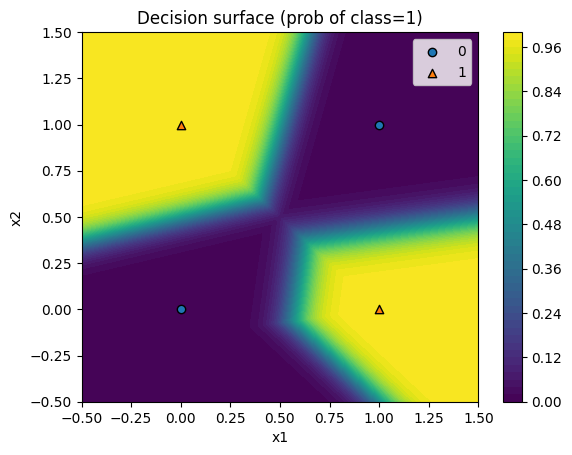

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# grid 생성
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 201),
                     np.linspace(-0.5, 1.5, 201))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    zz = model(grid).reshape(xx.shape).numpy()

plt.figure()
cs = plt.contourf(xx, yy, zz, levels=50)
plt.colorbar(cs); plt.title("Decision surface (prob of class=1)")

# 데이터 점
xy = X.numpy(); lab = y.numpy().ravel().astype(int)
plt.scatter(xy[lab==0,0], xy[lab==0,1], marker='o', edgecolors='k', label='0')
plt.scatter(xy[lab==1,0], xy[lab==1,1], marker='^', edgecolors='k', label='1')
plt.legend(); plt.xlabel('x1'); plt.ylabel('x2'); plt.show()
